In [1]:
import os
def count_files_in_folders(root_dir):
    '''Counts the number of files in each subdirectory of the root directory'''
    class_counts = {}
    for class_name in os.listdir(root_dir):
        class_dir = os.path.join(root_dir, class_name)
        if os.path.isdir(class_dir):
            # Count the number of files in the subdirectory 
            count = len([name for name in os.listdir(class_dir) 
                         if os.path.isfile(os.path.join(class_dir, name))])
            class_counts[class_name] = count
    return class_counts
root_path ='/kaggle/input/plantdisease/plantvillage/PlantVillage/'
counts = count_files_in_folders(root_path)
counts


{'Pepper__bell___Bacterial_spot': 997,
 'Potato___healthy': 152,
 'Tomato_Leaf_Mold': 952,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 3209,
 'Tomato_Bacterial_spot': 2127,
 'Tomato_Septoria_leaf_spot': 1771,
 'Tomato_healthy': 1591,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 1676,
 'Tomato_Early_blight': 1000,
 'Tomato__Target_Spot': 1404,
 'Pepper__bell___healthy': 1478,
 'Potato___Late_blight': 1000,
 'Tomato_Late_blight': 1909,
 'Potato___Early_blight': 1000,
 'Tomato__Tomato_mosaic_virus': 373}

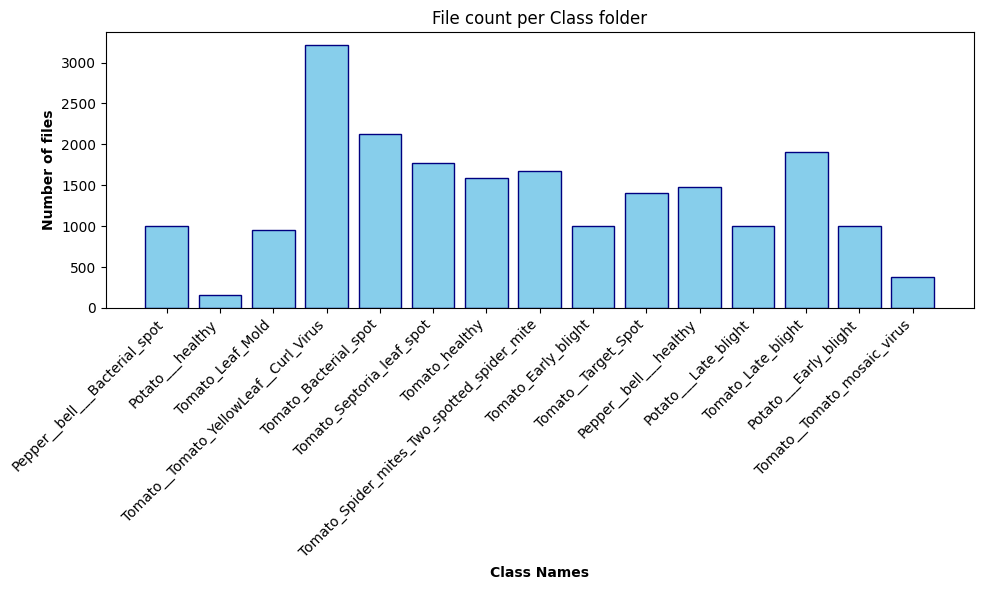

In [2]:
import matplotlib.pyplot as plt
# --- Plotting the data 

# Extract keys (class names) and values (count) for plotting 
classes = list(counts.keys())
value_counts = list(counts.values())

# Create the bar chart 
plt.figure(figsize=(10,6))
plt.bar(classes, value_counts, color='skyblue', edgecolor='navy')

# Add labels and title
plt.xlabel('Class Names', fontweight='bold')
plt.ylabel('Number of files', fontweight='bold')
plt.title('File count per Class folder')
plt.xticks(rotation=45, ha='right') # Rotate and align labels for readability

# Display the plot
plt.tight_layout()
plt.show()

Displaying random image: ['/kaggle/input/plantdisease/plantvillage/PlantVillage/Potato___Early_blight/d8efc91f-6e85-4508-8d49-9c4a11c4c71a___RS_Early.B 7484.JPG', '/kaggle/input/plantdisease/plantvillage/PlantVillage/Tomato_Early_blight/203d84bc-4acc-4cad-b4f9-f659ae641876___RS_Erly.B 7615.JPG', '/kaggle/input/plantdisease/plantvillage/PlantVillage/Tomato__Target_Spot/8284cba7-30b7-401d-923d-65f7786d7aae___Com.G_TgS_FL 8333.JPG', '/kaggle/input/plantdisease/plantvillage/PlantVillage/Potato___Early_blight/4da46a9d-7709-4528-acc3-a7be6ace3714___RS_Early.B 7187.JPG']


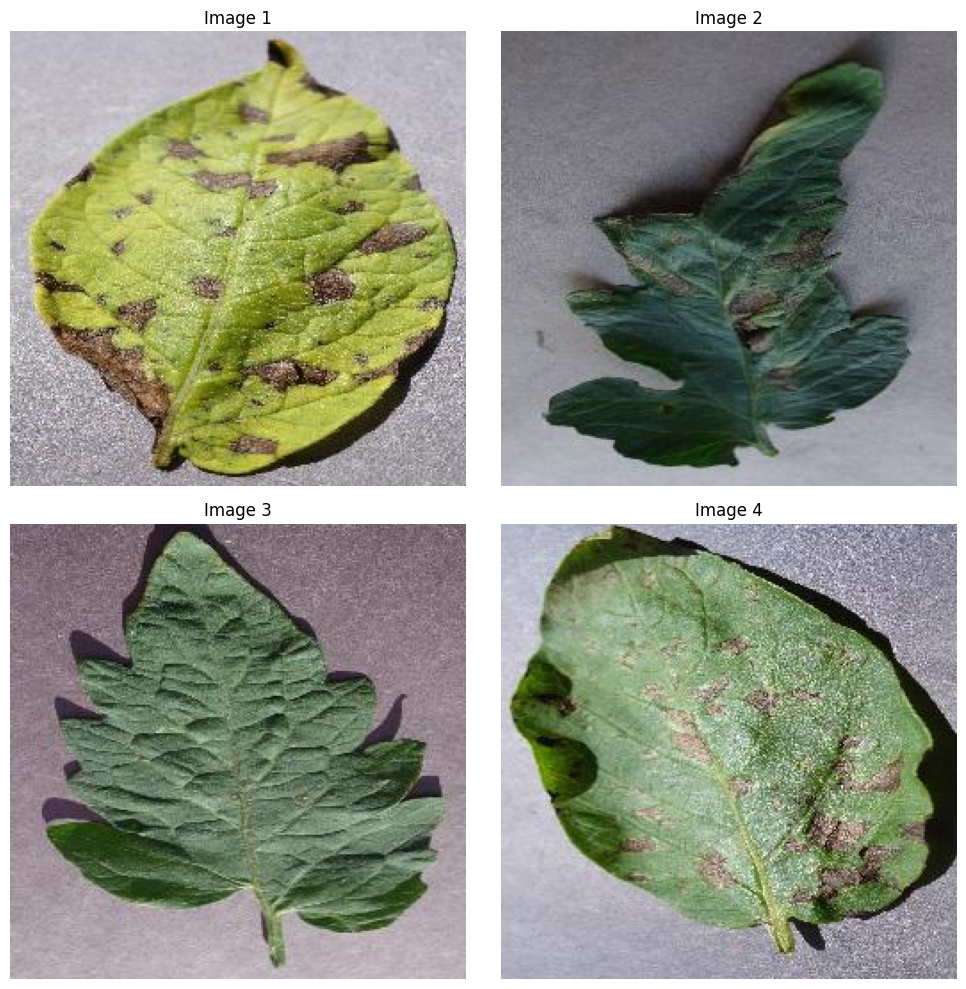

In [3]:
import matplotlib.image as mpimg 
import random 

# Define valid image extensions
img_ext = ('.png','.jpg', '.jpeg')

# Function to get all image paths reclusively 
def get_all_img_paths(directory):
    img_paths = []
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.lower().endswith(img_ext):
                img_paths.append(os.path.join(dirpath, filename))
    return img_paths

# Get all available image paths
all_images = get_all_img_paths(root_path)

if len(all_images) >= 4:
    images_to_display =  random.sample(all_images, 4)
    # Select a random image path
    print(f"Displaying random image: {images_to_display}")
fig, axes = plt.subplots(2,2,figsize=(10,10))
# Flatten the axes so that we can iterate over easily 
axes = axes.flatten()
for i, img_path in enumerate(images_to_display):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off') #hide axes 

plt.tight_layout()
plt.show()